In [107]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')
import datetime as ds

In [108]:
df=pd.read_csv('Airpassengers.csv')

In [109]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [110]:
df['Month'] = pd.to_datetime(df['Month'],format='%Y-%m')
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [121]:
df = df.rename(columns={'Month': 'ds',
                        '#Passengers': 'y'})

df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


# Train/test split

In [134]:
train=df.iloc[:132]
test=df.iloc[132:]

In [141]:
test

,ds,y
132,1960-01-01,417
133,1960-02-01,391
134,1960-03-01,419
135,1960-04-01,461
136,1960-05-01,472
137,1960-06-01,535
138,1960-07-01,622
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461


In [136]:
m=Prophet()
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [137]:
future=m.make_future_dataframe(periods=len(test),freq='MS')
forecast=m.predict(future)

In [138]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,109.214736,61.087635,111.032962,109.214736,109.214736,-23.958556,-23.958556,-23.958556,-23.958556,-23.958556,-23.958556,0.0,0.0,0.0,85.256180
1,1949-02-01,111.367591,52.471208,102.984292,111.367591,111.367591,-32.491925,-32.491925,-32.491925,-32.491925,-32.491925,-32.491925,0.0,0.0,0.0,78.875666
2,1949-03-01,113.312105,89.248982,139.926391,113.312105,113.312105,3.262693,3.262693,3.262693,3.262693,3.262693,3.262693,0.0,0.0,0.0,116.574798
3,1949-04-01,115.464960,82.846339,135.214378,115.464960,115.464960,-6.123334,-6.123334,-6.123334,-6.123334,-6.123334,-6.123334,0.0,0.0,0.0,109.341626
4,1949-05-01,117.548368,87.759791,138.838541,117.548368,117.548368,-5.280722,-5.280722,-5.280722,-5.280722,-5.280722,-5.280722,0.0,0.0,0.0,112.267646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08-01,467.731086,501.464309,552.038743,467.475002,467.957090,59.348436,59.348436,59.348436,59.348436,59.348436,59.348436,0.0,0.0,0.0,527.079522
140,1960-09-01,470.746827,460.359634,512.533059,470.429322,471.044543,15.122382,15.122382,15.122382,15.122382,15.122382,15.122382,0.0,0.0,0.0,485.869209
141,1960-10-01,473.665286,425.893943,479.961450,473.286346,474.019346,-21.462924,-21.462924,-21.462924,-21.462924,-21.462924,-21.462924,0.0,0.0,0.0,452.202363
142,1960-11-01,476.681028,397.531802,448.921486,476.233291,477.083998,-54.308372,-54.308372,-54.308372,-54.308372,-54.308372,-54.308372,0.0,0.0,0.0,422.372655


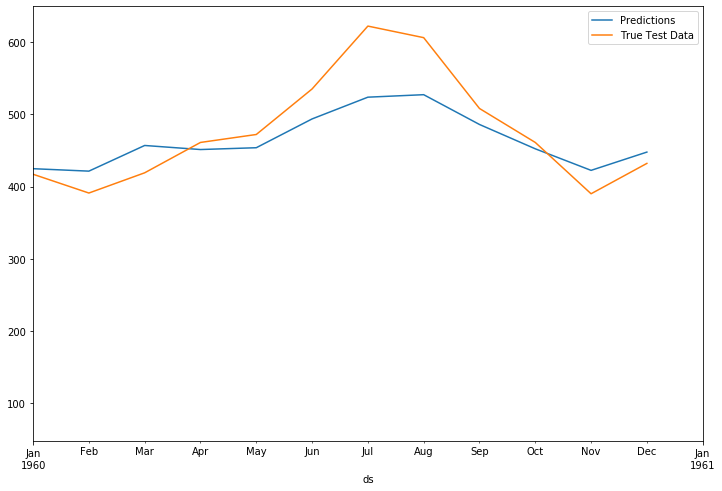

In [142]:
ax=forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('1960-01-01','1961-01-01'))

# RMSE

In [143]:
from statsmodels.tools.eval_measures import rmse

In [144]:
predictions=forecast.tail(len(test))['yhat']

In [146]:
rmse(predictions,test['y'])

43.129124948521856

# Forecast out of box

In [148]:
m=Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [155]:
future=m.make_future_dataframe(periods=24,freq='MS')

In [156]:
forecast=m.predict(future)

In [157]:
forecast.tail(24)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
144,1961-01-01,487.654638,438.736858,494.506689,487.654638,487.654638,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,0.0,0.0,0.0,465.712704
145,1961-02-01,490.770110,431.372296,490.114847,490.759311,490.779155,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,0.0,0.0,0.0,460.055941
146,1961-03-01,493.584085,466.438368,522.260531,493.548591,493.611718,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,0.0,0.0,0.0,493.108252
147,1961-04-01,496.699557,461.013332,519.433225,496.625030,496.761951,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,0.0,0.0,0.0,491.495702
148,1961-05-01,499.714530,466.704753,525.114271,499.602933,499.821720,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,0.0,0.0,0.0,495.888675
149,1961-06-01,502.830002,508.960378,565.904890,502.674325,502.986988,33.980094,33.980094,33.980094,33.980094,33.980094,33.980094,0.0,0.0,0.0,536.810095
150,1961-07-01,505.844974,548.885961,605.488820,505.628533,506.044273,70.670524,70.670524,70.670524,70.670524,70.670524,70.670524,0.0,0.0,0.0,576.515498
151,1961-08-01,508.960446,548.083469,606.535111,508.698255,509.218811,67.973548,67.973548,67.973548,67.973548,67.973548,67.973548,0.0,0.0,0.0,576.933994
152,1961-09-01,512.075918,499.357618,557.071210,511.754011,512.390428,16.329618,16.329618,16.329618,16.329618,16.329618,16.329618,0.0,0.0,0.0,528.405536
153,1961-10-01,515.090891,463.233906,520.586754,514.708336,515.456143,-21.972456,-21.972456,-21.972456,-21.972456,-21.972456,-21.972456,0.0,0.0,0.0,493.118435


In [158]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(24)

,ds,yhat_lower,yhat_upper,yhat
144,1961-01-01,438.736858,494.506689,465.712704
145,1961-02-01,431.372296,490.114847,460.055941
146,1961-03-01,466.438368,522.260531,493.108252
147,1961-04-01,461.013332,519.433225,491.495702
148,1961-05-01,466.704753,525.114271,495.888675
149,1961-06-01,508.960378,565.904890,536.810095
150,1961-07-01,548.885961,605.488820,576.515498
151,1961-08-01,548.083469,606.535111,576.933994
152,1961-09-01,499.357618,557.071210,528.405536
153,1961-10-01,463.233906,520.586754,493.118435


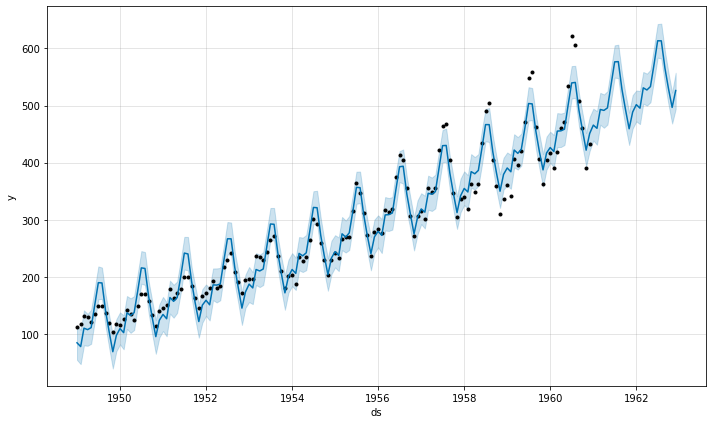

In [159]:
m.plot(forecast);

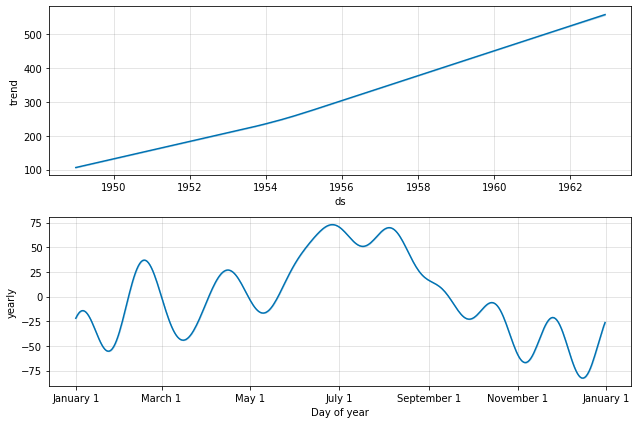

In [160]:
m.plot_components(forecast);